In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets


In [4]:
df = pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [5]:
df.shape

(1000, 3)

(array([ 26.,  87., 124., 121.,  87.,  84.,  63.,  54.,  43.,  49.,  31.,
         24.,  19.,  16.,   7.,  16.,  22.,  14.,  11.,  17.,  13.,   7.,
          7.,   4.,   7.,   5.,   2.,   5.,   3.,   4.,   1.,   4.,   4.,
          2.,   3.,   1.,   0.,   2.,   3.,   2.,   1.,   0.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  250.  ,   613.48,   976.96,  1340.44,  1703.92,  2067.4 ,
         2430.88,  2794.36,  3157.84,  3521.32,  3884.8 ,  4248.28,
         4611.76,  4975.24,  5338.72,  5702.2 ,  6065.68,  6429.16,
         6792.64,  7156.12,  7519.6 ,  7883.08,  8246.56,  8610.04,
         8973.52,  9337.  ,  9700.48, 10063.96, 10427.44, 10790.92,
        11154.4 , 11517.88, 11881.36, 12244.84, 12608.32, 12971.8 ,
        13335.28, 13698.76, 14062.24, 14425.72, 14789.2 , 15152.68,
        15516.16, 15879.64, 16243.12, 16606.6 , 16970.08, 17333.56,
        17697.04, 18060.52, 18424.  ]),
 <a list of 50 Patch objects>)

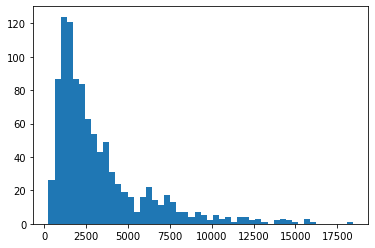

In [17]:
plt.hist(df['CreditAmount'], 50)

In [21]:
amount_interval_points = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amount_intervals = [(amount_interval_points[i] + int(i != 0), amount_interval_points[i + 1]) for i in np.arange(len(amount_interval_points) - 1)]
amount_intervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [22]:
amount_intervals_df = pd.DataFrame(amount_intervals, columns=['intervalLeftSide', 'intervalRightSide'])
amount_intervals_df

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [25]:
# credibility table preparation
credibility0 = []
credibility1 = []
for intervals in amount_intervals:
    sub_data = df[df['CreditAmount'] >= intervals[0]]
    sub_data = sub_data[sub_data['CreditAmount'] <= intervals[1] ]
    credibility0.append(sum(sub_data['Creditability'] == 0 ))
    credibility1.append(sum(sub_data['Creditability'] == 1))

print(credibility0)
print(credibility1)

[3, 34, 51, 33, 26, 75, 34, 20, 21, 3]
[15, 64, 139, 93, 79, 200, 68, 26, 14, 2]


In [27]:
temp = pd.DataFrame(np.column_stack([credibility0, credibility1]), columns=['Credibility0', 'Credibility1'])
temp

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [34]:
compare_credit_worthiness_df = pd.concat([amount_intervals_df, temp], axis=1)
compare_credit_worthiness_df['total'] = compare_credit_worthiness_df['Credibility0'] + compare_credit_worthiness_df['Credibility1']
compare_credit_worthiness_df

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


Text(0.5, 1.0, 'credibility = 0')

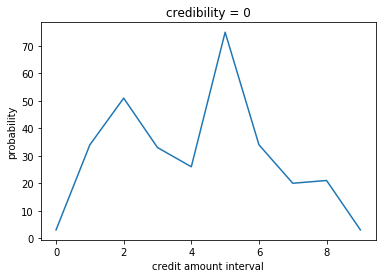

In [38]:
plt.plot(compare_credit_worthiness_df['Credibility0'])
plt.xlabel('credit amount interval')
plt.ylabel('probability')
plt.title('credibility = 0')

Text(0.5, 1.0, 'credibility = 1')

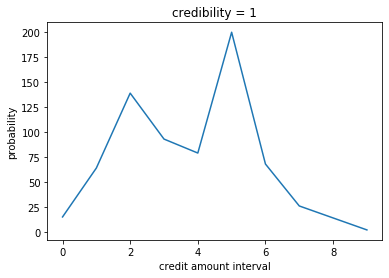

In [39]:
plt.plot(compare_credit_worthiness_df['Credibility1'])
plt.xlabel('credit amount interval')
plt.ylabel('probability')
plt.title('credibility = 1')

In [43]:
X = df['CreditAmount']
y = df['Creditability'].astype('category')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 5)

In [46]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.589260
         Iterations 5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.021     
Dependent Variable: Creditability    AIC:              828.9636  
Date:               2019-07-25 20:23 BIC:              838.0657  
No. Observations:   700              Log-Likelihood:   -412.48   
Df Model:           1                LL-Null:          -421.51   
Df Residuals:       698              LLR p-value:      2.1532e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          1.3152    0.1328   9.9039  0.0000   1.0549   1.5755
CreditAmount  -0.0001    0.0000  -4.2309  0.0000  -0.0002  -0.0001
=================================================================

"""

In [48]:
prediction_df = pd.DataFrame({'actual': y_test, 'predicted': lg.predict(sm.add_constant(X_test))})
prediction_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,actual,predicted
544,1,0.755267
515,1,0.723529
193,1,0.738889
11,1,0.636615
279,1,0.764566
653,1,0.734893
643,0,0.637855
763,0,0.633761
198,1,0.741562
721,1,0.747039


In [50]:
cf = metrics.confusion_matrix(prediction_df['actual'], prediction_df['predicted'], [1,0])

ValueError: Classification metrics can't handle a mix of binary and continuous targets